In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
pd.set_option('display.max_columns', None)

In [8]:
# Carga el archivo CSV en un DataFrame
csv_file_path = '/content/Electric_Vehicle_Population_Data.csv'
# Use on_bad_lines='skip' to skip problematic lines
df = pd.read_csv(csv_file_path, on_bad_lines='skip')

# Muestra las primeras 5 filas del DataFrame
print("DataFrame cargado desde el archivo CSV:")
display(df.head())

DataFrame cargado desde el archivo CSV:


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261976 entries, 0 to 261975
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         261976 non-null  object 
 1   County                                             261968 non-null  object 
 2   City                                               261968 non-null  object 
 3   State                                              261976 non-null  object 
 4   Postal Code                                        261968 non-null  float64
 5   Model Year                                         261976 non-null  int64  
 6   Make                                               261976 non-null  object 
 7   Model                                              261976 non-null  object 
 8   Electric Vehicle Type                              261976 non-null  object

In [11]:
df.shape

(261976, 17)

In [12]:
print("Número de valores distintos por columna:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Número de valores distintos por columna:
VIN (1-10): 15513
County: 226
City: 830
State: 50
Postal Code: 1030
Model Year: 21
Make: 46
Model: 179
Electric Vehicle Type: 2
Clean Alternative Fuel Vehicle (CAFV) Eligibility: 3
Electric Range: 111
Base MSRP: 31
Legislative District: 49
DOL Vehicle ID: 257635
Vehicle Location: 1029
Electric Utility: 76
2020 Census Tract: 2286


In [13]:
print("Número de valores faltantes por columna:")
display(df.isnull().sum())

Número de valores faltantes por columna:


,0
VIN (1-10),0
County,8
City,8
State,0
Postal Code,8
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [14]:
# Calculate the mean of the 'Legislative District' column
mean_legislative_district = df['Legislative District'].mean()

# Fill the missing values in 'Legislative District' with the calculated mean
df['Legislative District'].fillna(mean_legislative_district, inplace=True)

# Verify that there are no more missing values in the 'Legislative District' column
print("Número de valores faltantes después de imputar la media en 'Legislative District':")
display(df['Legislative District'].isnull().sum())

Número de valores faltantes después de imputar la media en 'Legislative District':


/tmp/ipython-input-35907356.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Legislative District'].fillna(mean_legislative_district, inplace=True)


np.int64(0)

In [16]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB5K,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,347724772,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,1C4RJXU67R,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,272165288,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,KNDCD3LD0N,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,203182584,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,5UXKT0C37H,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,349010287,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,1N4AZ0CP1D,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,131684150,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [19]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Verificar que no hay valores faltantes
print("Número de valores faltantes después de eliminar filas con faltantes:")
display(df.isnull().sum())

Número de valores faltantes después de eliminar filas con faltantes:


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [21]:
# Contar el número de filas duplicadas
num_duplicates = df.duplicated().sum()

print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 4341


In [25]:
# Check if 'VIN (1-10)' column exists before attempting to drop it
if 'VIN (1-10)' in df.columns:
    # Eliminar la columna 'VIN (1-10)'
    df.drop('VIN (1-10)', axis=1, inplace=True)

# Obtener la lista de columnas
cols = df.columns.tolist()

# Mover 'DOL Vehicle ID' al principio de la lista
if 'DOL Vehicle ID' in cols:
  cols.insert(0, cols.pop(cols.index('DOL Vehicle ID')))
else:
  print("'DOL Vehicle ID' not found in columns.")


# Reindexar el DataFrame con el nuevo orden de columnas
df = df[cols]

# Mostrar las primeras filas para verificar el cambio
print("DataFrame con 'VIN (1-10)' eliminada y 'DOL Vehicle ID' como primera columna:")
display(df.head())

DataFrame con 'VIN (1-10)' eliminada y 'DOL Vehicle ID' como primera columna:


,DOL Vehicle ID,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle Location,Electric Utility,2020 Census Tract
0,347724772,Yakima,Yakima,WA,98901.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,15.0,POINT (-120.50729 46.60464),PACIFICORP,5.307700e+10
1,272165288,Kitsap,Port Orchard,WA,98367.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,35.0,POINT (-122.68471 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
2,203182584,Snohomish,Lynnwood,WA,98036.0,2022,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,32.0,POINT (-122.29245 47.82557),PUGET SOUND ENERGY INC,5.306105e+10
3,349010287,King,Auburn,WA,98001.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,0.0,30.0,POINT (-122.23035 47.3074),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,131684150,Skagit,Mount Vernon,WA,98273.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,40.0,POINT (-122.33891 48.41644),PUGET SOUND ENERGY INC,5.305795e+10


In [27]:
# Contar el número de filas duplicadas
num_duplicates = df.duplicated().sum()

print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 4341


In [28]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

# Verificar que no hay filas duplicadas
print("Número de filas duplicadas después de eliminarlas:")
display(df.duplicated().sum())

Número de filas duplicadas después de eliminarlas:


np.int64(0)

In [29]:
print("Número de valores faltantes por columna:")
display(df.isnull().sum())

print("\nNúmero de filas duplicadas:")
display(df.duplicated().sum())

Número de valores faltantes por columna:


,0
DOL Vehicle ID,0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0



Número de filas duplicadas:


np.int64(0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257616 entries, 0 to 261975
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   DOL Vehicle ID                                     257616 non-null  int64  
 1   County                                             257616 non-null  object 
 2   City                                               257616 non-null  object 
 3   State                                              257616 non-null  object 
 4   Postal Code                                        257616 non-null  float64
 5   Model Year                                         257616 non-null  int64  
 6   Make                                               257616 non-null  object 
 7   Model                                              257616 non-null  object 
 8   Electric Vehicle Type                              257616 non-null  object 
 9 

In [36]:
df['Electric Range'].describe()

,Electric Range
count,257616.000000
mean,43.128412
std,81.633600
min,0.000000
25%,0.000000
50%,0.000000
75%,35.000000
max,337.000000


In [37]:
df['Base MSRP'].describe()

,Base MSRP
count,257616.000000
mean,705.109970
std,6996.831139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,845000.000000


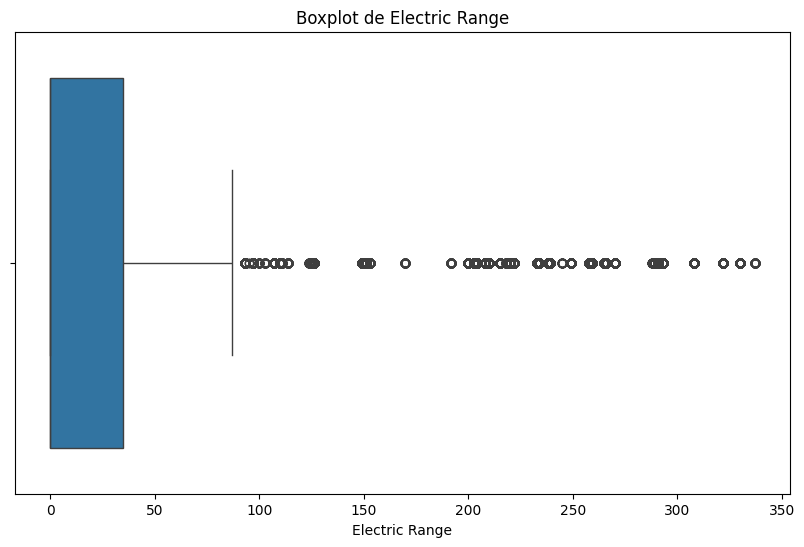

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Electric Range'])
plt.title('Boxplot de Electric Range')
plt.xlabel('Electric Range')
plt.show()

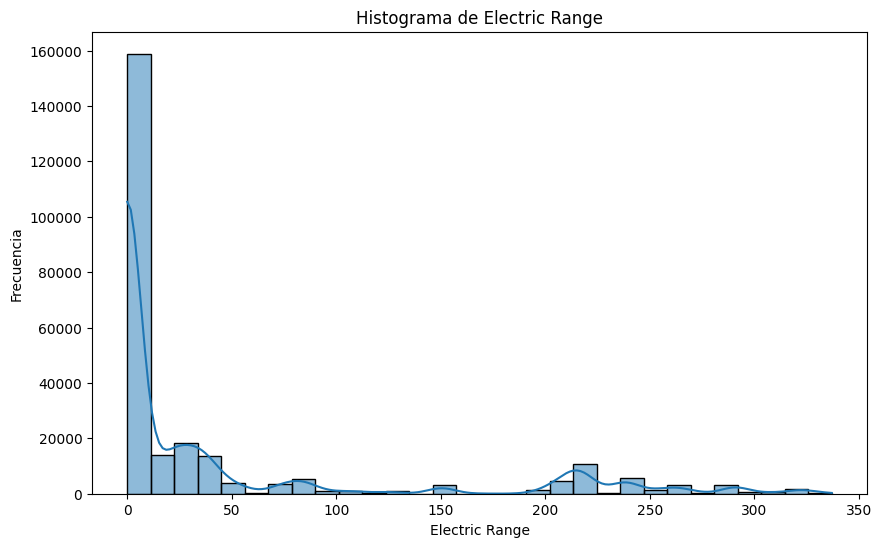

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Histograma de Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
cleaned_csv_file_path = '/content/Electric_Vehicle_Population_Data_cleaned.csv'
df.to_csv(cleaned_csv_file_path, index=False)

print(f"DataFrame limpio guardado en: {cleaned_csv_file_path}")

DataFrame limpio guardado en: /content/Electric_Vehicle_Population_Data_cleaned.csv
